# Importando a base de dados

Primeiro temos que importar a base de dados usando o pandas. Algumas problemas surgem aqui, como: a codificação, o separador do arquivo csv, linhas que estão com informações que não seguem o padrão, entre outras coisas. Os parâmetros encoding, sep e on_bad_lines servem para tratar os problemas mencionados anteriormente respectivamente.

Além disso, a linha que serve como cabeçalho das colunas veio errada. Para tratar isso, o parâmetro header teve que ser mudado para 1 a fim de considerar a linha 2 (linha de índice 1) como a linha que vai dar nome as colunas do dataframe.

In [24]:
import pandas as pd

In [25]:
dados_df = pd.read_csv('despesa_ceaps_2022.csv', header= 1, encoding = "ISO-8859-1", on_bad_lines = 'skip', sep = ';', decimal = ',', thousands='.')
dados_df

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000.00,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500.00,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000.00,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000.00,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000.00,2173617
...,...,...,...,...,...,...,...,...,...,...,...
6155,2022,5,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,SKBUPO,11/05/2022,"Companhia Aérea: GOL, Localizador: SKBUPO. Pas...",3422.77,2179913
6156,2022,5,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,DTNHTY,12/05/2022,"Companhia Aérea: GOL, Localizador: DTNHTY. Pas...",3399.61,2180294
6157,2022,5,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,WRREKJ,17/05/2022,"Companhia Aérea: GOL, Localizador: WRREKJ. Pas...",2184.54,2180363
6158,2022,5,ZEQUINHA MARINHO,"Passagens aéreas, aquáticas e terrestres nacio...",22.052.777/0001-32,Exceller Tour,SKP1MQ,17/05/2022,"Companhia Aérea: AZUL, Localizador: SKP1MQ. Pa...",2903.15,2180365


# Fazendo o tratamento dos dados

Agora, temos que eliminar as linhas que possuem valores NaN (valores não especificados).

In [26]:
dados = dados_df.dropna()
dados.sample(4)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
430,2022,2,CARLOS PORTINHO,"Locomoção, hospedagem, alimentação, combustíve...",27.402.097/0001-15,RESTAURANTE MANGAI,70188,07/02/2022,ALMOÇO NO GABINETE,42.98,2174083
1998,2022,5,FERNANDO COLLOR,"Passagens aéreas, aquáticas e terrestres nacio...",26.480.780/0001-08,LM TURISMO LIMITADA,AGNWWX,21/05/2022,"Companhia Aérea: LATAM, Localizador: AGNWWX. P...",3216.84,2180756
3245,2022,3,JOSÉ SERRA,"Locomoção, hospedagem, alimentação, combustíve...",56.548.779/0019-68,Transamerica Comercial e Servicos LTDA,00022603,24/03/2022,Senador José Serra - Despesa de hospedagem com...,2100.00,2177182
1324,2022,2,ELIZIANE GAMA,"Contratação de consultorias, assessorias, pesq...",18.557.836/0001-57,Guimaraes e tavera comunicação e publicidade ltda,00000090,16/03/2022,"Análise, planejamento de comunicação e gestão ...",3000.00,2177309


Para ter certeza de que não temos nenhum elemento NaN no dataframe, podemos verificar se existe algum valor nulo e transformar essa resposta em um  booleano 0 ou 1. Depois disso, somamos tudo. Caso a resposta da soma seja 0, então eliminamos todos os valores nulos.

In [27]:
(dados.isnull() * 1).sum()

ANO                  0
MES                  0
SENADOR              0
TIPO_DESPESA         0
CNPJ_CPF             0
FORNECEDOR           0
DOCUMENTO            0
DATA                 0
DETALHAMENTO         0
VALOR_REEMBOLSADO    0
COD_DOCUMENTO        0
dtype: int64

Convertendo os campos de data que estão em string para o formato de data do pandas

In [28]:
dados.loc[:]['DATA'] = pd.to_datetime(arg = dados.loc[:]['DATA'], utc=True)
dados.sample(4)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
4833,2022,3,RODRIGO CUNHA,"Aluguel de imóveis para escritório político, c...",02.558.157/0001-62,TELEFÔNICA BRASIL S/A,000001126357806,01/04/2022,DESPESA DE TELEFONE CELULAR DO SENADOR RODRIGO...,219.98,2178226
4719,2022,3,RENAN CALHEIROS,"Contratação de consultorias, assessorias, pesq...",13.385.266/0001-41,CÍCERO GOMES DA SILVA MARKETING DIRETO,00000125,28/03/2022,"Serviços, referente ao monitoramento das diver...",1200.00,2177396
1931,2022,4,FERNANDO BEZERRA COELHO,"Aluguel de imóveis para escritório político, c...",20.755.190/0001-64,SUBCONDOMINIO COMPLEXO EMPRESARIAL RM TRADE CE...,0535337,22/03/2022,Despesa com taxa de condomínio - escritório pa...,617.60,2178789
4501,2022,2,PAULO ROCHA,"Passagens aéreas, aquáticas e terrestres nacio...",16.978.175/0001-08,Adria Viagens e Turismo Ltda,VVVSPH,17/02/2022,"Companhia Aérea: LATAM, Localizador: VVVSPH. P...",1965.55,2175123


Com o método info, vemos claramente que os dados em cada coluna estão apresentados no formato correto

In [29]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3119 entries, 0 to 6159
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ANO                3119 non-null   int64  
 1   MES                3119 non-null   int64  
 2   SENADOR            3119 non-null   object 
 3   TIPO_DESPESA       3119 non-null   object 
 4   CNPJ_CPF           3119 non-null   object 
 5   FORNECEDOR         3119 non-null   object 
 6   DOCUMENTO          3119 non-null   object 
 7   DATA               3119 non-null   object 
 8   DETALHAMENTO       3119 non-null   object 
 9   VALOR_REEMBOLSADO  3119 non-null   float64
 10  COD_DOCUMENTO      3119 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 292.4+ KB


# Tirando insights a partir da base de dados

In [30]:
dados.sample(5)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
2590,2022,3,IZALCI LUCAS,"Aluguel de imóveis para escritório político, c...",00.663.872/0001-30,AP ASSESSORIA PATRIMONIAL E IMOBILIÁRIA LTDA,82017,14/03/2022,Gastos com aluiguel do escritório de apoio do ...,1140.00,2178571
1121,2022,1,DAVI ALCOLUMBRE,"Locomoção, hospedagem, alimentação, combustíve...",07.605.506/0001-73,RIBAL LOCADORA DE VEÍCULOS LTDA.,2659,01/02/2022,Despesas com locação de meio de transporte.,2685.00,2173540
3824,2022,4,MARA GABRILLI,"Aluguel de imóveis para escritório político, c...",46.395.000/0001-39,MUNICÍPIO DE SÃO PAULO,00036220,23/03/2022,Despesa referente ao IPTU do imóvel locado par...,734.54,2177561
4655,2022,3,RANDOLFE RODRIGUES,"Contratação de consultorias, assessorias, pesq...",37.039.911/0001-32,RUBENS BOULHOSA ADV. E CONSULT-SOC.IND.DE.ADV,202200000000006,07/03/2022,"Consultorias, assessorias, pesquisas, trabalho...",6000.00,2175680
1323,2022,2,ELIZIANE GAMA,"Contratação de consultorias, assessorias, pesq...",40.479.493/0001-09,Alexandre Baldez Sociedade Individual de Advoc...,00000024,28/04/2022,Referente a consultoria jurídica da atividade ...,15000.00,2179420


Senadores que mais declararam despesas

In [31]:
numero_despesas_por_candidato = dados.groupby(['SENADOR', 'TIPO_DESPESA']).size().to_frame().reset_index().rename(columns={0: 'Número de despesas'})

In [32]:
numero_despesas_por_candidato

,SENADOR,TIPO_DESPESA,Número de despesas
0,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",5
1,ACIR GURGACZ,"Contratação de consultorias, assessorias, pesq...",2
2,ACIR GURGACZ,Divulgação da atividade parlamentar,21
3,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",9
4,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",16
...,...,...,...
189,WELLINGTON FAGUNDES,"Passagens aéreas, aquáticas e terrestres nacio...",19
190,WELLINGTON FAGUNDES,Serviços de Segurança Privada,2
191,WEVERTON ROCHA,"Passagens aéreas, aquáticas e terrestres nacio...",48
192,ZENAIDE MAIA,"Passagens aéreas, aquáticas e terrestres nacio...",7


In [33]:
top10_num_despesas = numero_despesas_por_candidato[['SENADOR', 'Número de despesas']].groupby('SENADOR').sum().sort_values(by='Número de despesas', ascending=False)
top10_num_despesas = top10_num_despesas.head(10).reset_index()
top10_num_despesas

,SENADOR,Número de despesas
0,JAQUES WAGNER,173
1,HUMBERTO COSTA,167
2,PAULO PAIM,150
3,WELLINGTON FAGUNDES,134
4,FERNANDO BEZERRA COELHO,130
5,CONFÚCIO MOURA,127
6,ELMANO FÉRRER,117
7,EDUARDO GOMES,113
8,FABIANO CONTARATO,104
9,CARLOS PORTINHO,99


In [34]:
mascara = []

for i in range(numero_despesas_por_candidato.shape[0]):
    mascara.append(False)

In [35]:
for i in range(numero_despesas_por_candidato.shape[0]):
    for j in range(top10_num_despesas.shape[0]):
        if numero_despesas_por_candidato['SENADOR'][i] == top10_num_despesas['SENADOR'][j]:
            mascara[i] = True

In [36]:
candidados_despesas_maiores = numero_despesas_por_candidato[mascara]
candidados_despesas_maiores.head(10)

,SENADOR,TIPO_DESPESA,Número de despesas
15,CARLOS PORTINHO,"Aluguel de imóveis para escritório político, c...",12
16,CARLOS PORTINHO,Aquisição de material de consumo para uso no e...,7
17,CARLOS PORTINHO,"Contratação de consultorias, assessorias, pesq...",6
18,CARLOS PORTINHO,"Locomoção, hospedagem, alimentação, combustíve...",44
19,CARLOS PORTINHO,"Passagens aéreas, aquáticas e terrestres nacio...",30
25,CONFÚCIO MOURA,"Aluguel de imóveis para escritório político, c...",4
26,CONFÚCIO MOURA,Aquisição de material de consumo para uso no e...,4
27,CONFÚCIO MOURA,"Contratação de consultorias, assessorias, pesq...",12
28,CONFÚCIO MOURA,Divulgação da atividade parlamentar,69
29,CONFÚCIO MOURA,"Locomoção, hospedagem, alimentação, combustíve...",36


Gráfico completo com os senadores que possuem mais despesas

In [37]:
import plotly.express as px

fig = px.bar(candidados_despesas_maiores, x='SENADOR', y='Número de despesas', color='TIPO_DESPESA', width=1000, height=500, title='Senadores que possuem mais despesas')
fig.update_layout(showlegend=False)
fig.show()

Gastos de cada Senador

In [38]:
gasto_por_senador = dados[['SENADOR', 'VALOR_REEMBOLSADO']].groupby(['SENADOR']).sum().reset_index().sort_values(by=['VALOR_REEMBOLSADO'], ascending=False).head(10).reset_index()
gasto_por_senador = gasto_por_senador.drop(columns=['index'])
gasto_por_senador

,SENADOR,VALOR_REEMBOLSADO
0,RANDOLFE RODRIGUES,214276.00
1,OMAR AZIZ,194426.84
2,ELMANO FÉRRER,194172.25
3,ACIR GURGACZ,172266.85
4,FERNANDO BEZERRA COELHO,170972.36
5,RODRIGO CUNHA,162627.17
6,NELSINHO TRAD,159535.07
7,ELIZIANE GAMA,157314.73
8,MARCELO CASTRO,146990.23
9,MARCIO BITTAR,142708.90


Gráfico com os gastos dos 10 senadores que gastam mais

In [39]:
fig = px.bar(gasto_por_senador, x='SENADOR', y='VALOR_REEMBOLSADO', text_auto=True, title="Valor reembolsado por senador")
fig.show()

In [40]:
gasto_percentual_por_candidato = {}
for sen, valor in zip(gasto_por_senador['SENADOR'], gasto_por_senador['VALOR_REEMBOLSADO']):
    gasto_percentual_por_candidato[sen] = round((valor/gasto_por_senador['VALOR_REEMBOLSADO'].sum()) * 100, 4)
    
gasto_percentual_por_candidato

{'RANDOLFE RODRIGUES': 12.4921,
 'OMAR AZIZ': 11.3349,
 'ELMANO FÉRRER': 11.3201,
 'ACIR GURGACZ': 10.043,
 'FERNANDO BEZERRA COELHO': 9.9675,
 'RODRIGO CUNHA': 9.481,
 'NELSINHO TRAD': 9.3008,
 'ELIZIANE GAMA': 9.1713,
 'MARCELO CASTRO': 8.5694,
 'MARCIO BITTAR': 8.3198}

Verificando as despesas dos vereadores que gastam mais

In [41]:
mask = []

for i in range(dados.shape[0]):
    mask.append(False)

In [42]:
for k,i in enumerate(dados['SENADOR']):
    for j in range(gasto_por_senador.shape[0]):
        if i == gasto_por_senador['SENADOR'][j]:
            mask[k] = True

In [43]:
despesas_senadores_maior_valor = dados[mask][['SENADOR', 'TIPO_DESPESA', 'VALOR_REEMBOLSADO']]
despesas_senadores_maior_valor.head()

,SENADOR,TIPO_DESPESA,VALOR_REEMBOLSADO
0,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",6000.0
1,ACIR GURGACZ,Divulgação da atividade parlamentar,1500.0
2,ACIR GURGACZ,Divulgação da atividade parlamentar,6000.0
3,ACIR GURGACZ,Divulgação da atividade parlamentar,1000.0
4,ACIR GURGACZ,Divulgação da atividade parlamentar,2000.0


In [44]:
despesas_senadores_maior_valor = despesas_senadores_maior_valor.groupby(['SENADOR', 'TIPO_DESPESA']).sum().reset_index()
despesas_senadores_maior_valor.head()

,SENADOR,TIPO_DESPESA,VALOR_REEMBOLSADO
0,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",30000.00
1,ACIR GURGACZ,"Contratação de consultorias, assessorias, pesq...",12000.00
2,ACIR GURGACZ,Divulgação da atividade parlamentar,34000.00
3,ACIR GURGACZ,"Locomoção, hospedagem, alimentação, combustíve...",56537.00
4,ACIR GURGACZ,"Passagens aéreas, aquáticas e terrestres nacio...",39729.85


In [45]:
fig = px.bar(despesas_senadores_maior_valor, x='SENADOR', y='VALOR_REEMBOLSADO', color='TIPO_DESPESA', width=1000, height=500, title='Senadores com maior valor de reembolso')
fig.update_layout(showlegend=False)
fig.show()

# Importando dataframe da soma de reembolsos dos candidatos a cada mês

In [46]:
soma_reembolsos_mes = pd.read_csv('dataset_ceaps_forecasting.csv')

Média dos últimos 3 meses

In [47]:
media_ultimos_3_meses = round(soma_reembolsos_mes.loc[soma_reembolsos_mes.shape[0] - 3:]['y'].mean(), 2)
media_ultimos_3_meses

56020.24

Fazendo uma regressão linear

In [48]:
import numpy as np

X = np.arange(0, soma_reembolsos_mes.shape[0])
X = X[:, np.newaxis]
X

array([[   0],
       [   1],
       [   2],
       ...,
       [1458],
       [1459],
       [1460]])

In [49]:
y = np.array(soma_reembolsos_mes['y'])
y

array([ 13062.46,  61972.66,  54424.44, ...,  22495.76, 118345.56,
        27219.41])

In [50]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, y)

In [51]:
reg.predict([[1461], [1462], [1463]])

array([62638.6213297 , 62636.92854834, 62635.23576699])

Plotando o gráfico

In [52]:
y_model = reg.predict(X)

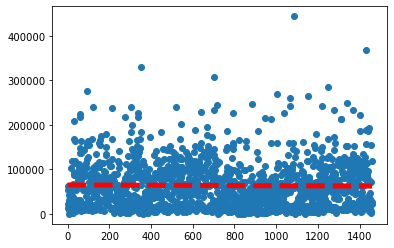

In [53]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(X,y)
plt.plot(X,y_model, color='red', linewidth=5.0, linestyle='--')
plt.show()